<a href="https://colab.research.google.com/github/wdelugar/AnalysticsAndVisuals/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)


(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)


Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
df_hh_income.isnull().any()
df_hh_income.duplicated()
df_pct_poverty.isnull().any()
df_pct_poverty.duplicated()
df_pct_completed_hs.isnull().any()
df_pct_completed_hs.duplicated()
df_share_race_city.isnull().any()
df_share_race_city.duplicated()
df_fatalities.isnull().any()
df_fatalities.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2530,False
2531,False
2532,False
2533,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_hh_income.fillna(0)
df_pct_poverty.fillna(0)
df_pct_completed_hs.fillna(0)
df_share_race_city.fillna(0)
df_fatalities.fillna('0')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [9]:
df_hh_income.duplicated()
df_pct_poverty.duplicated()
df_pct_completed_hs.duplicated()
df_share_race_city.duplicated()
df_fatalities.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2530,False
2531,False
2532,False
2533,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty.head()
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace('-', '0')
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)
df_pct_poverty.head()

df_pov_rate = df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg({'poverty_rate':pd.Series.mean})
df_pov_rate.sort_values('poverty_rate', ascending=False)


,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51
18,LA,22.29
40,SC,22.11
49,WV,21.08
1,AL,20.61
36,OK,20.55


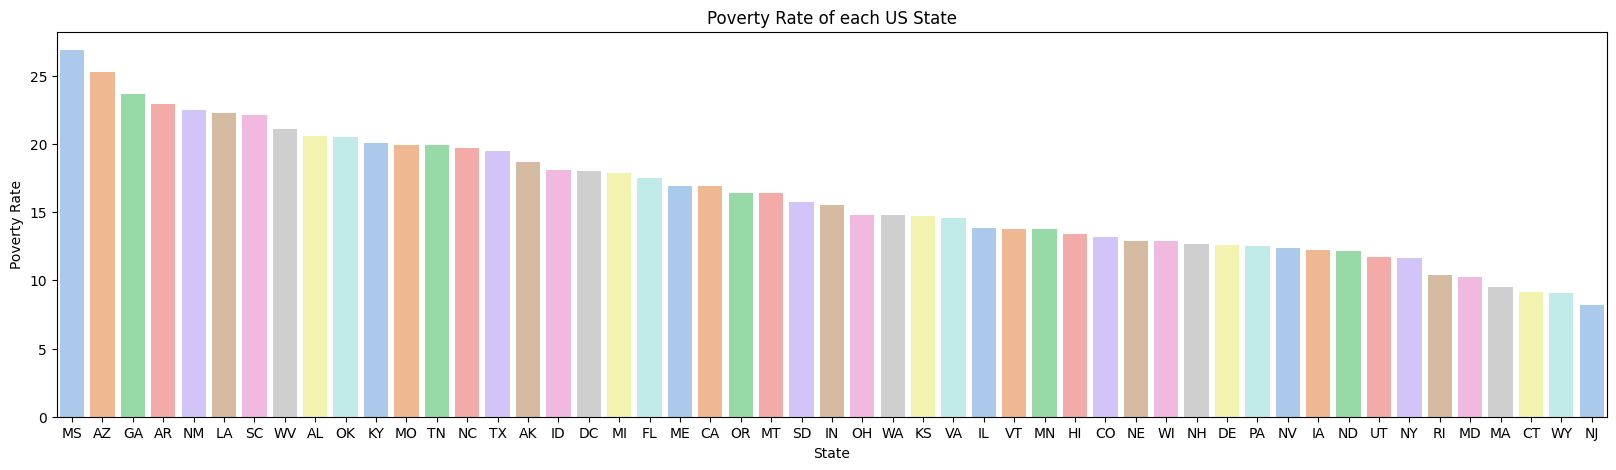

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Geographic Area', y='poverty_rate', data=df_pov_rate.sort_values('poverty_rate', ascending=False), hue='Geographic Area',palette='pastel')
plt.title('Poverty Rate of each US State')
plt.xlabel('State')
plt.ylabel('Poverty Rate')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

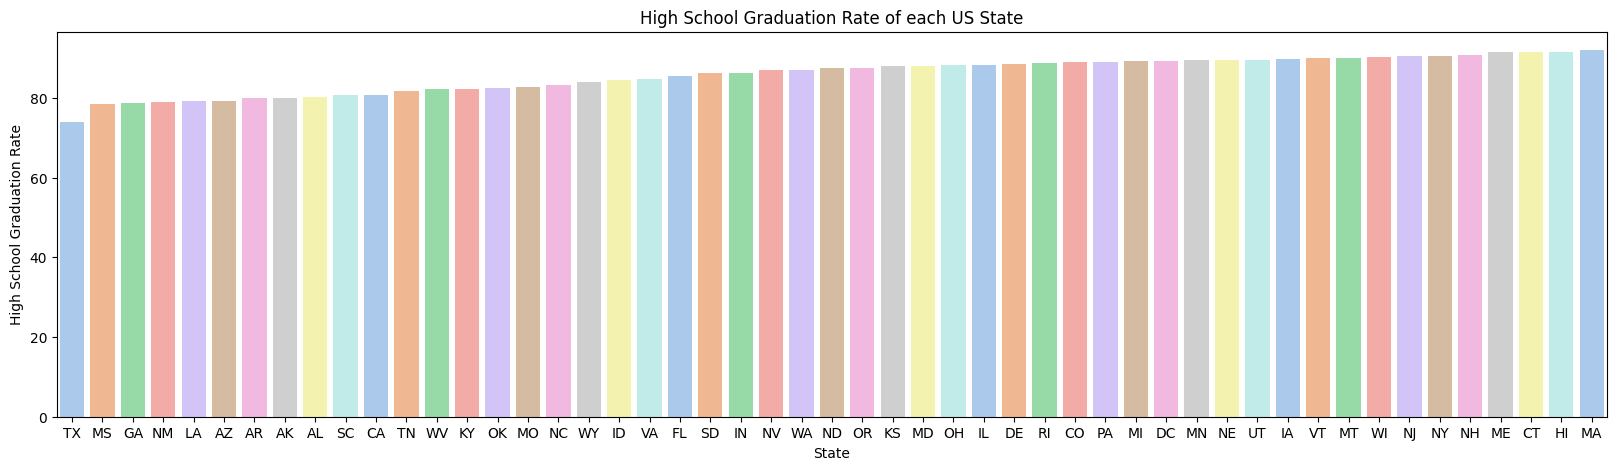

In [12]:
df_pct_completed_hs.head()
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].str.replace('-', '0')
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
df_pct_completed_hs.head()

df_hs_grad_rate = df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs':pd.Series.mean})
df_hs_grad_rate.sort_values('percent_completed_hs', ascending=True)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Geographic Area', y='percent_completed_hs', data=df_hs_grad_rate.sort_values('percent_completed_hs', ascending=True), hue='Geographic Area',palette='pastel')
plt.title('High School Graduation Rate of each US State')
plt.xlabel('State')
plt.ylabel('High School Graduation Rate')
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [13]:
state = df_pov_rate['Geographic Area']
poverty_rate = df_pov_rate['poverty_rate']
high_school_graduation_rate = df_hs_grad_rate['percent_completed_hs']

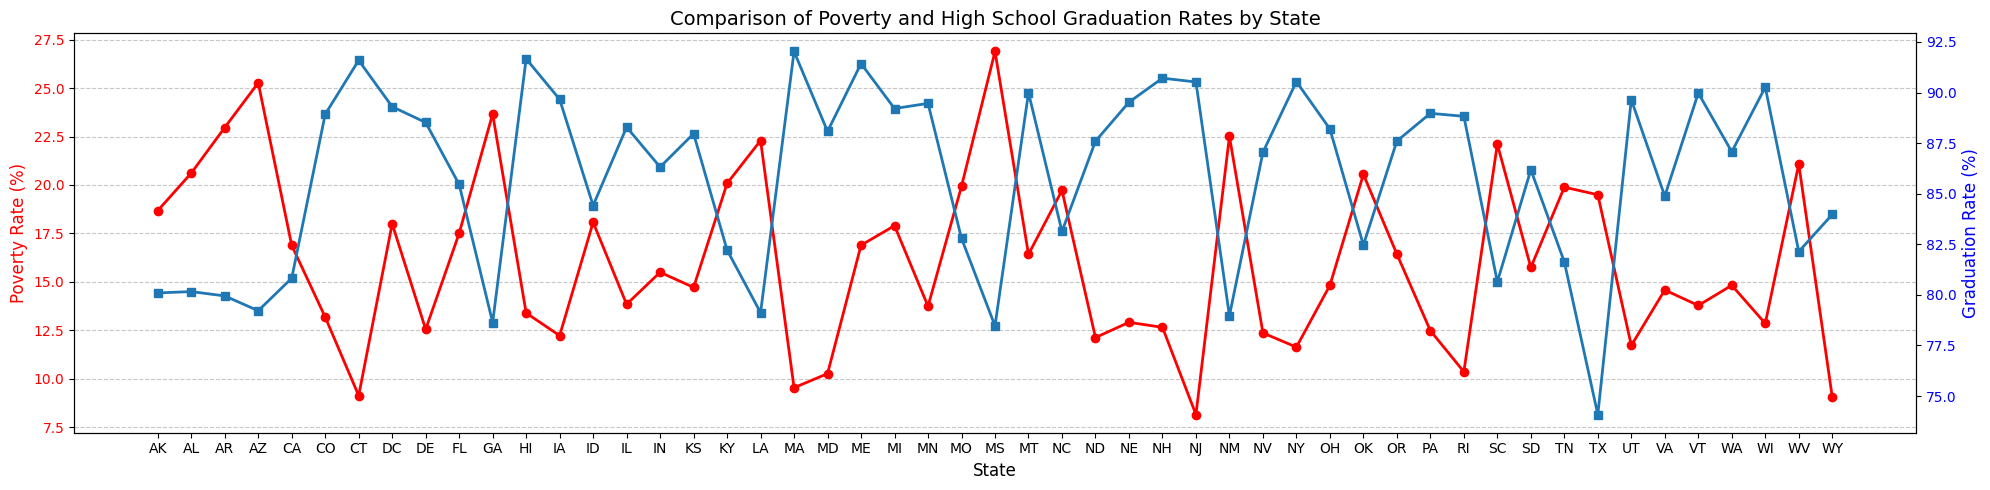

In [14]:
fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(state, poverty_rate, label='Poverty Rate (%)', color='red', marker='o', linewidth=2)
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Poverty Rate (%)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')
# ax1.set_xticklabels(state, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(state, high_school_graduation_rate, label='Graduation Rate (%)', marker='s', linewidth=2)
ax2.set_ylabel('Graduation Rate (%)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Comparison of Poverty and High School Graduation Rates by State', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [15]:
data = pd.DataFrame({
    'State': state,
    'Poverty Rate':poverty_rate,
    'Grad Rate': high_school_graduation_rate
})

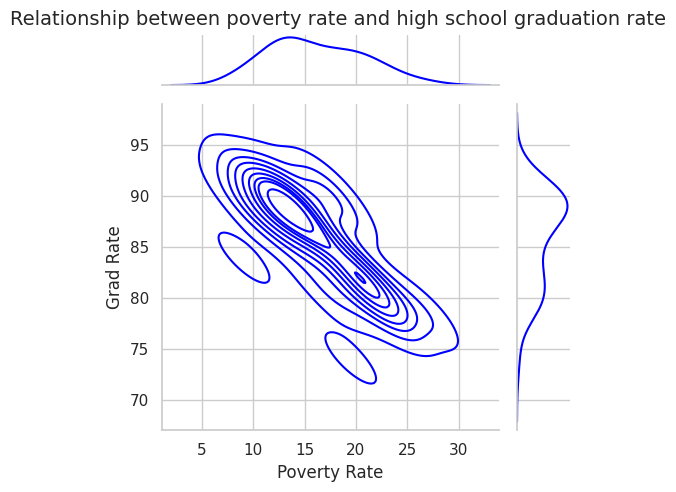

In [16]:
sns.set(style="whitegrid")
g = sns.jointplot(
    data=data,
    x="Poverty Rate",
    y="Grad Rate",
    kind="kde",
    height=5,
    color="blue",
)
g.fig.suptitle('Relationship between poverty rate and high school graduation rate', fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.93)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

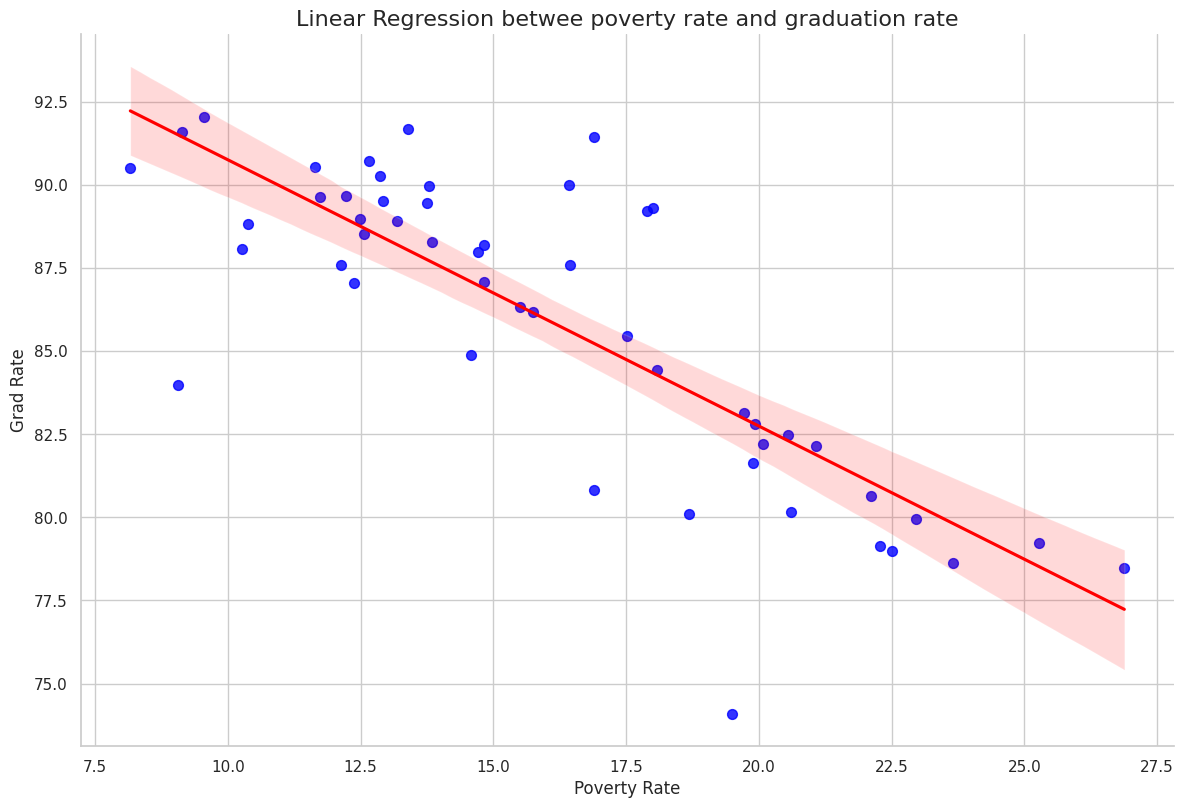

In [17]:
sns.set(style="whitegrid")
sns.lmplot(
    data=data,
    x="Poverty Rate",
    y="Grad Rate",
    height=8,
    aspect=1.5,
    scatter_kws={'color': 'blue', 's': 50},
    line_kws={'color': 'red'},
    ci=95
)
plt.title('Linear Regression betwee poverty rate and graduation rate',fontsize=16)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [23]:
states = df_share_race_city['Geographic area'].unique()
# df_hs_grad_rate = df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs':pd.Series.mean})
# df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].str.replace('-', '0')
# df_share_race_city['share_white'] = df_share_race_city['share_white'].str.replace('(X)','0')
df_share_race_city['share_white'] = df_share_race_city['share_white'].astype(float)
# df_share_race_city['share_black'] = df_share_race_city['share_black'].str.replace('(X)','0')
df_share_race_city['share_black'] = df_share_race_city['share_black'].astype(float)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].str.replace('(X)','0')
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].astype(float)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].str.replace('(X)','0')
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].astype(float)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].str.replace('(X)','0')
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].astype(float)
white = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'share_white':pd.Series.mean})
black = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'share_black':pd.Series.mean})
hispanic = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'share_hispanic':pd.Series.mean})
asian = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'share_asian':pd.Series.mean})
native_american = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'share_native_american':pd.Series.mean})
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


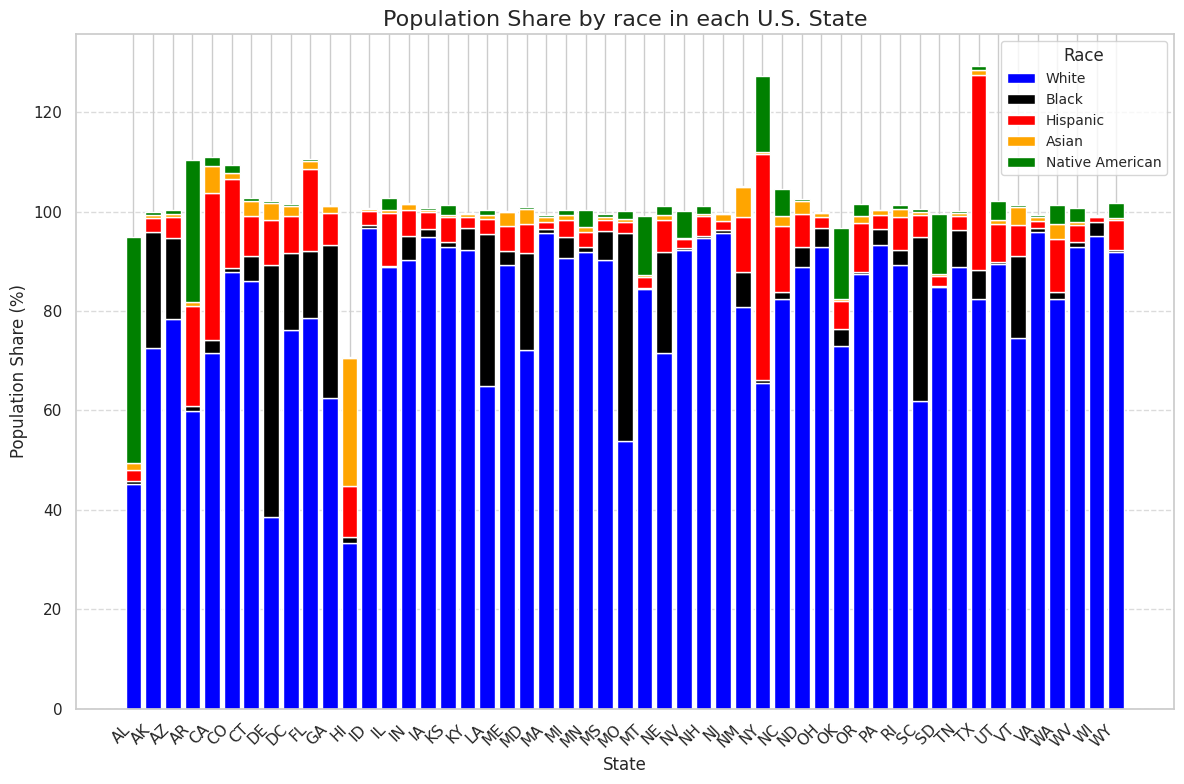

In [24]:
x  = np.arange(len(states))

plt.figure(figsize=(12, 8))
plt.bar(x, white['share_white'], label='White', color='blue')
plt.bar(x, black['share_black'], bottom=white['share_white'], label='Black', color='black')
plt.bar(x, hispanic['share_hispanic'], bottom=white['share_white']+black['share_black'], label='Hispanic', color='red')
plt.bar(x, asian['share_asian'], bottom=white['share_white']+black['share_black']+hispanic['share_hispanic'], label='Asian', color='orange')
plt.bar(x, native_american['share_native_american'], bottom=white['share_white']+black['share_black']+hispanic['share_hispanic']+asian['share_asian'], label='Native American', color='green')

plt.xticks(x, states, rotation=45, ha='right')
plt.xlabel('State', fontsize=12)
plt.ylabel('Population Share (%)', fontsize=12)
plt.title('Population Share by race in each U.S. State', fontsize=16)
plt.legend(title='Race', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [25]:
fatalities_by_race = df_fatalities['race'].value_counts()

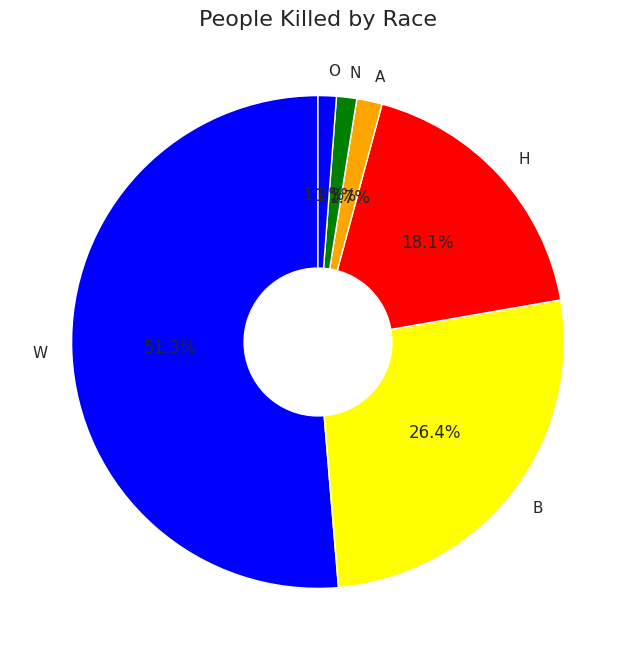

,count
race,
W,1201
B,618
H,423
A,39
N,31
O,28


In [26]:
plt.figure(figsize=(8, 8))
plt.pie(fatalities_by_race, labels=fatalities_by_race.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow', 'red', 'orange', 'green'],wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('People Killed by Race', fontsize=16)
center_circle = plt.Circle((0, 0), 0.30, fc='white')
plt.gca().add_artist(center_circle)
plt.title('People Killed by Race', fontsize=16)
plt.show()
fatalities_by_race

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [27]:
fatalities_by_gender = df_fatalities['gender'].value_counts()

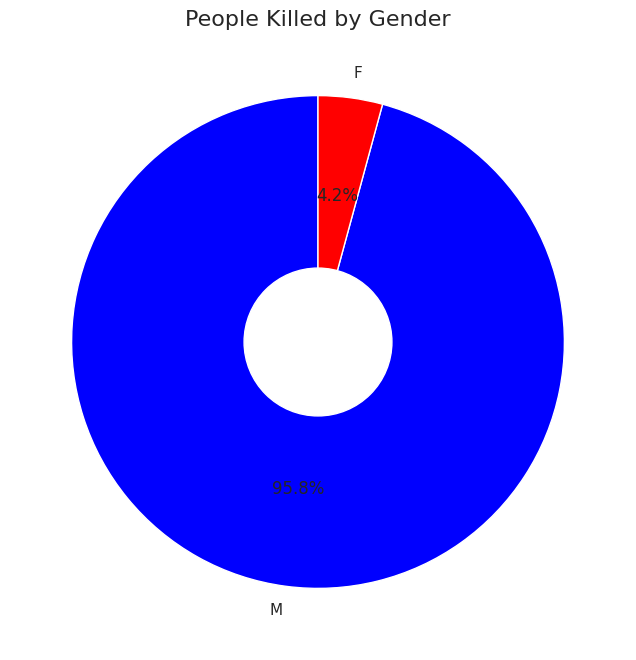

,count
gender,
M,2428
F,107


In [28]:
plt.figure(figsize=(8, 8))
plt.pie(fatalities_by_gender, labels=fatalities_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'],wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('People Killed by Gender', fontsize=16)
center_circle = plt.Circle((0, 0), 0.30, fc='white')
plt.gca().add_artist(center_circle)
plt.title('People Killed by Gender', fontsize=16)
plt.show()
fatalities_by_gender

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [29]:
Age = df_fatalities['age']
Gender = df_fatalities['gender']
Manner_of_Death = df_fatalities['manner_of_death']

In [30]:
data = pd.DataFrame({
    'Age': Age,
    'Gender': Gender,
    'Manner of Death': Manner_of_Death
})

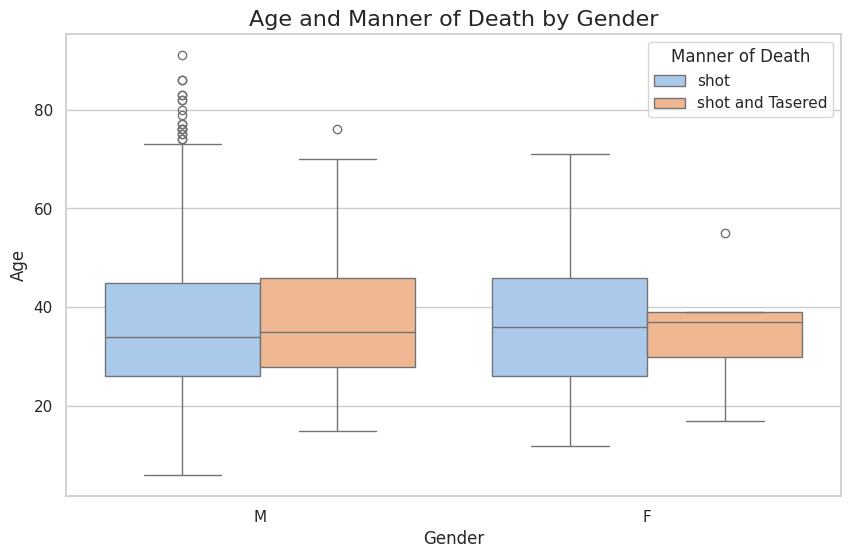

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', hue='Manner of Death', data=data, palette='pastel')
plt.title('Age and Manner of Death by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [32]:
weapon_armed = df_fatalities['armed'].value_counts()

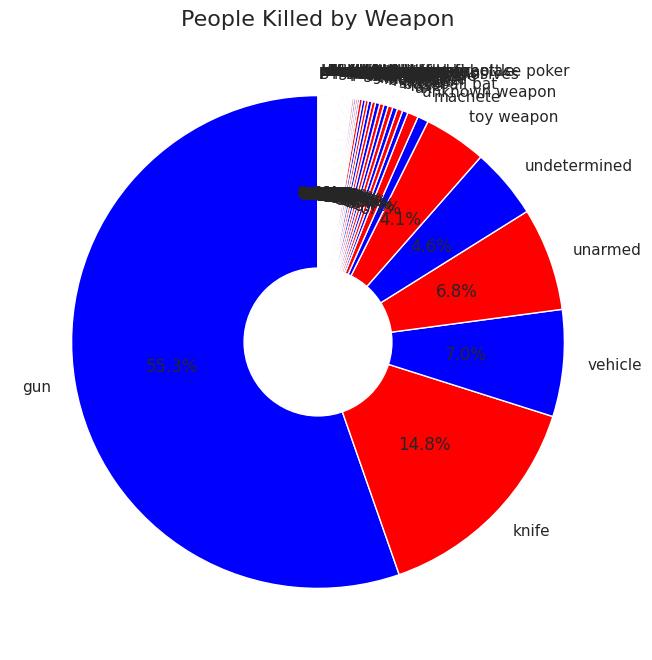

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(weapon_armed, labels=weapon_armed.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'],wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('People Killed by Weapon', fontsize=16)
center_circle = plt.Circle((0, 0), 0.30, fc='white')
plt.gca().add_artist(center_circle)
plt.title('People Killed by Weapon', fontsize=16)
plt.show()

In [34]:
weapon_armed

,count
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
hand torch,1
garden tool,1
pole,1


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

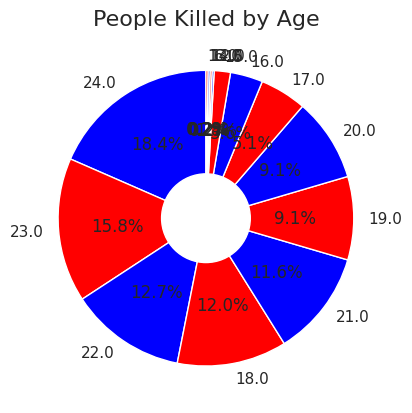

In [35]:
age_under_25 = df_fatalities[df_fatalities['age'] < 25]
age_under_25 = age_under_25['age'].value_counts()
plt.figure.figsize = (8, 8)
plt.pie(age_under_25, labels=age_under_25.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'],wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('People Killed by Age', fontsize=16)
center_circle = plt.Circle((0, 0), 0.30, fc='white')
plt.gca().add_artist(center_circle)
plt.title('People Killed by Age', fontsize=16)
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

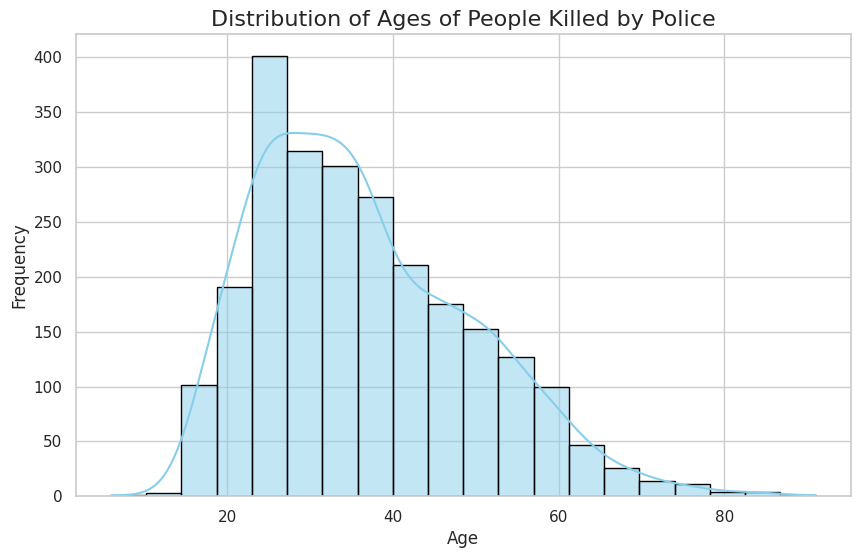

In [36]:
age = df_fatalities['age']
plt.figure(figsize=(10, 6))
sns.histplot(age, kde=True, bins=20, color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Ages of People Killed by Police', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

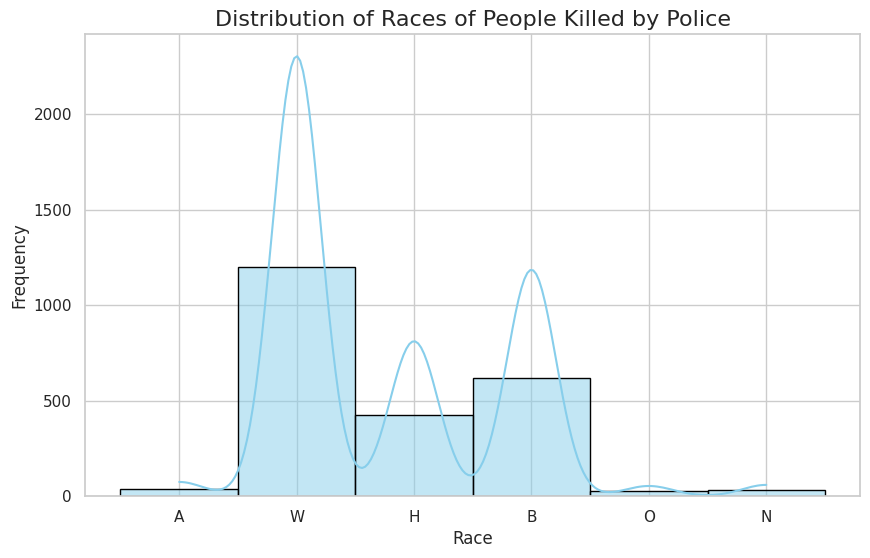

In [37]:
race = df_fatalities['race']
plt.figure(figsize=(10, 6))
sns.histplot(race, kde=True, bins=20, color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Races of People Killed by Police', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [38]:
total_people_killed_by_race = df_fatalities['race'].value_counts()


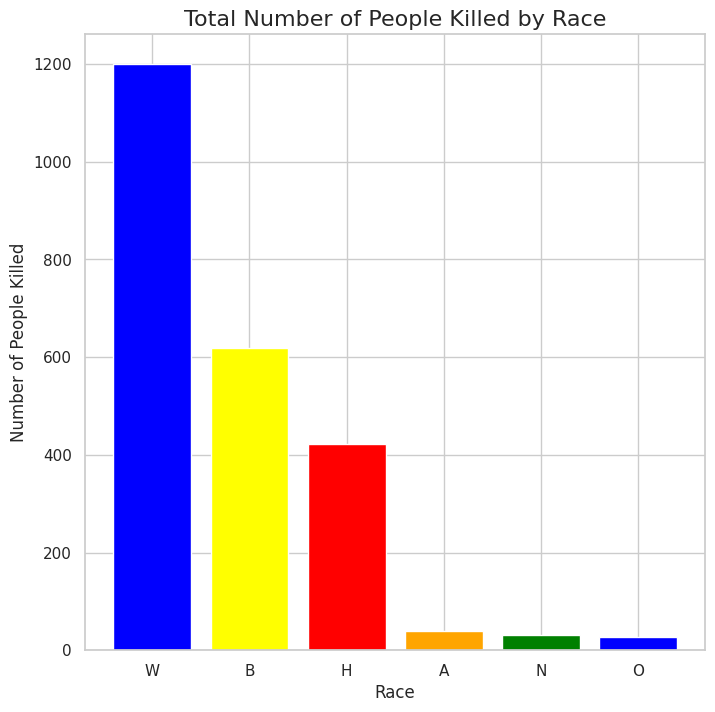

In [39]:
plt.figure(figsize=(8, 8))
plt.bar(total_people_killed_by_race.index, total_people_killed_by_race.values, color=['blue', 'yellow', 'red', 'orange', 'green'])
plt.title('Total Number of People Killed by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of People Killed', fontsize=12)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [41]:
mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()

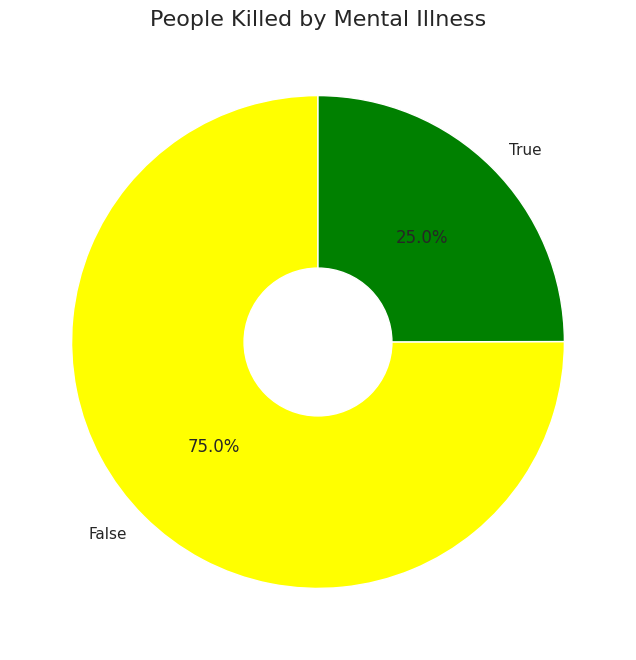

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(mental_illness, labels=mental_illness.index, autopct='%1.1f%%', startangle=90, colors=['yellow', 'green'],wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('People Killed by Mental Illness', fontsize=16)
center_circle = plt.Circle((0, 0), 0.30, fc='white')
plt.gca().add_artist(center_circle)
plt.title('People Killed by Mental Illness', fontsize=16)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [73]:
df_fatalities['race'] = df_fatalities['race'].astype(str).replace('nan', 'Unknown')
df_fatalities['city'] = df_fatalities['city'].astype(str)
city = df_fatalities['city'].value_counts().head(10)
city.sort_values(ascending=False)
city

,count
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Austin,18
Miami,18


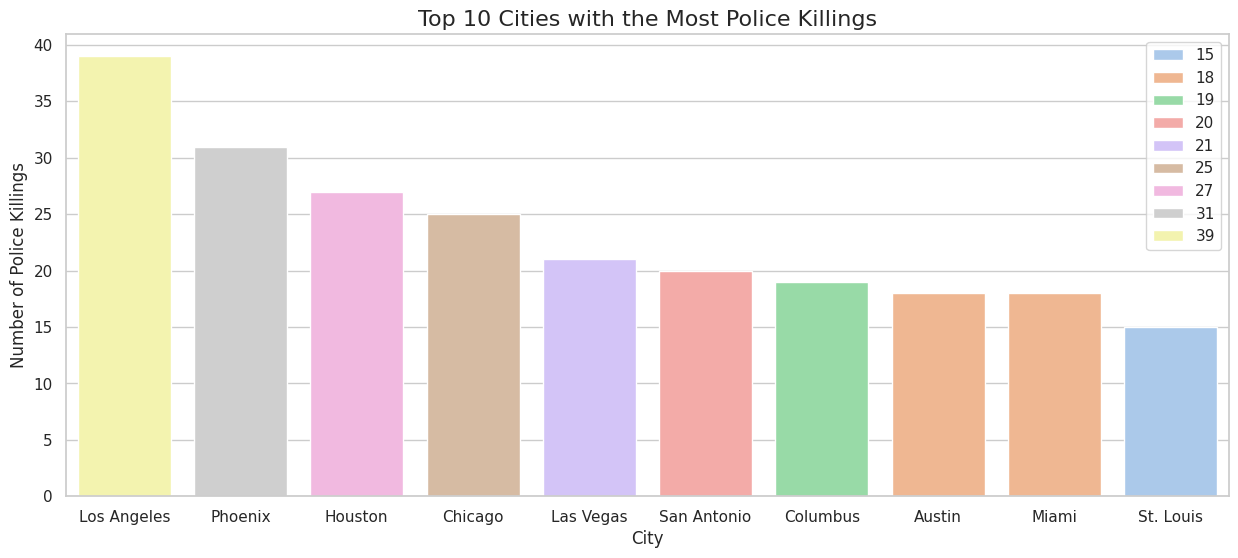

In [44]:
plt.figure(figsize=(15, 6))
sns.barplot(x=city.index, y=city.values, hue=city.values,palette='pastel')
plt.title('Top 10 Cities with the Most Police Killings', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Police Killings', fontsize=12)
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [74]:
# city
death_by_city = df_fatalities['city'].value_counts().head(10).reset_index(name='count')
death_by_city.columns = ['city', 'count']
death_by_city = death_by_city.sort_values(by='count', ascending=False)
death_by_city

rate_death_by_race = df_fatalities.groupby(['city', 'race']).size().reset_index(name='count')
rate_death_by_race = rate_death_by_race.sort_values(by='city', ascending=False)
data = []


for city in death_by_city['city']:
    city_data = rate_death_by_race[rate_death_by_race['city'] == city]
    for race in city_data['race']:
        race_data = city_data[city_data['race'] == race]
        count = race_data['count'].values[0]
        data.append(city_data)
data = pd.concat(data)
data = data.sort_values(by='city', ascending=True)

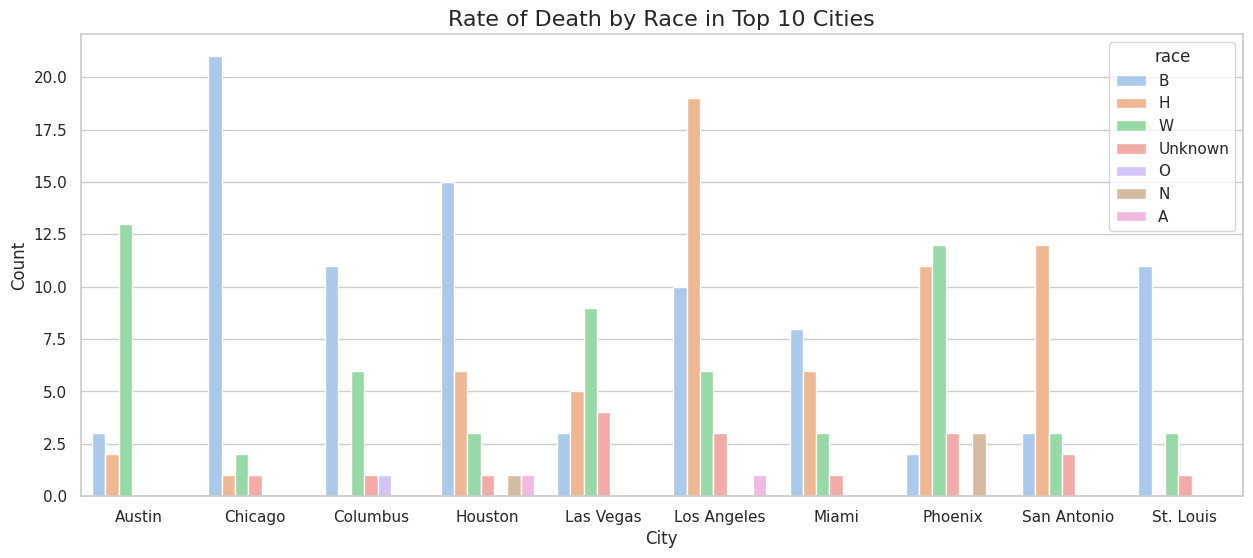

In [75]:
plt.figure(figsize=(15, 6))
sns.barplot(x='city', y='count', hue='race', data=data, palette='pastel')
plt.title('Rate of Death by Race in Top 10 Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [76]:
death_by_state = df_fatalities['state'].value_counts().reset_index(name='count')
death_by_state.columns = ['state', 'count']

In [77]:
fig = px.choropleth(
    death_by_state,
    locations='state',
    locationmode='USA-states',
    color='count',
    scope='usa',
    color_continuous_scale='Reds',
    title='Number of Police Killings by US State',
    labels={'count': 'Number of Police Killings'}
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [113]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['year'] = df_fatalities['date'].dt.year
df_fatalities['year'] = df_fatalities['year'].astype(str)


In [114]:
killings_by_year = df_fatalities['year'].value_counts().reset_index(name='count')
killings_by_year

,year,count
0,2015,991
1,2016,963
2,2017,581


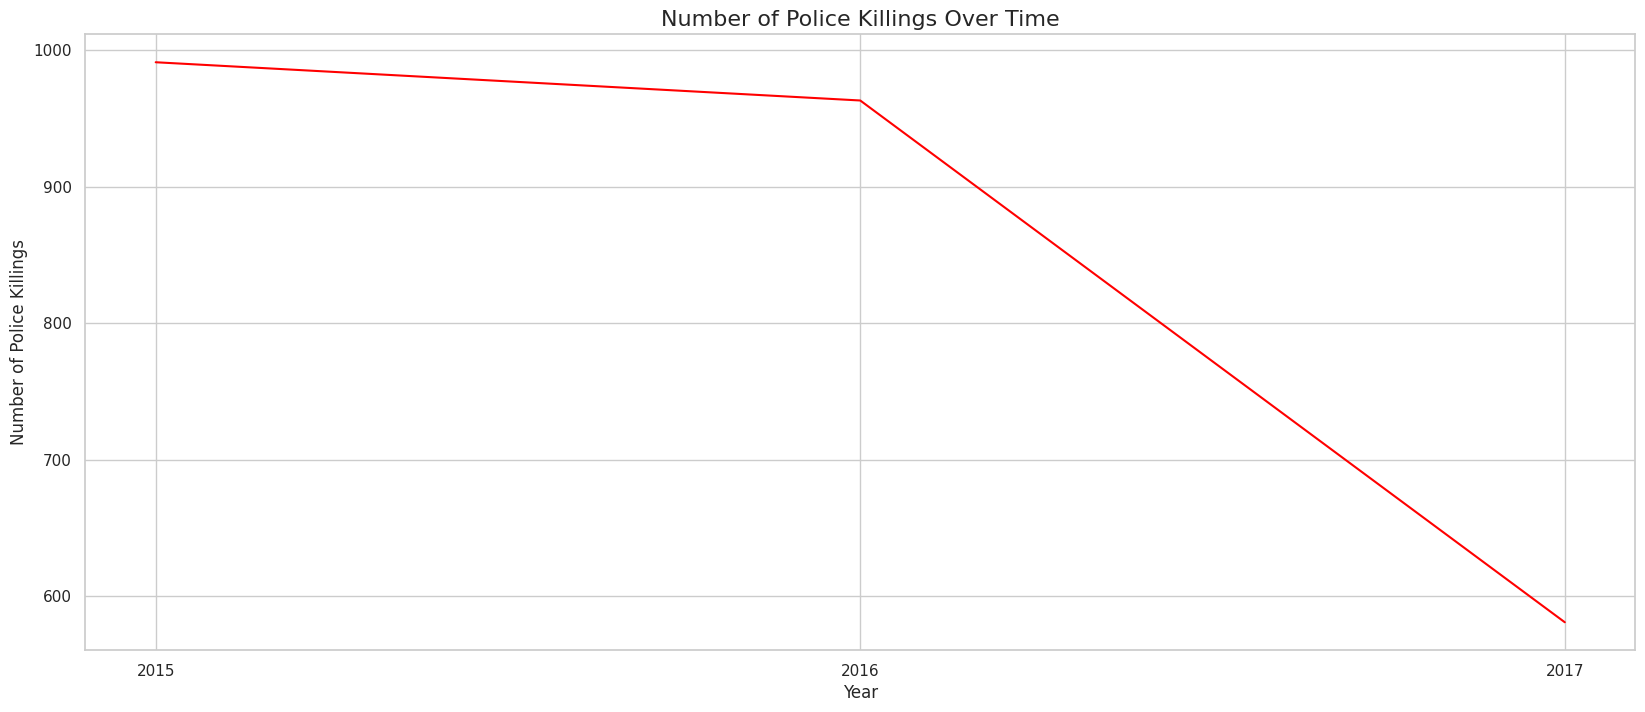

In [115]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=killings_by_year['year'], y=killings_by_year['count'], color='red')
plt.title('Number of Police Killings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Police Killings', fontsize=12)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [116]:
print('Task Completed!')

Task Completed!
